Pearson’s correlation coefficient using Python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
# Load data and show first 5 rows
df = pd.read_csv("imports-85.csv")
df.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
# Adding headers to df
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size","fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = headers
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
# Replace ? with NaN 
df = df.replace('?',np.NaN)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
# Check df for missing values
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Running for loop to check missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

In [8]:
# Replacing NaNs with mean/most common variant
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
avg_bore = df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)
avg_stroke = df['stroke'].astype('float').mean(axis=0)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
avg_price = df['price'].astype('float').mean(axis=0)
df['price'].replace(np.nan, avg_price, inplace=True)
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [9]:
# Checking df types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
# Formating data types
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

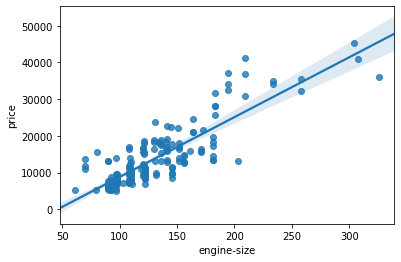

In [11]:
# Creating a plot engine-size and price
sns.regplot(x="engine-size", y="price", data=df)

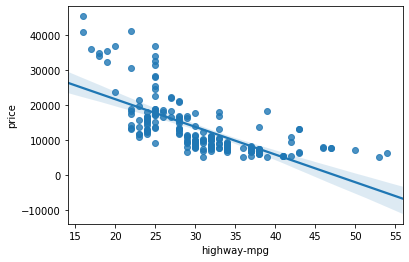

In [12]:
# Creating a plot highway-mpg and price
sns.regplot(x="highway-mpg", y="price", data=df)

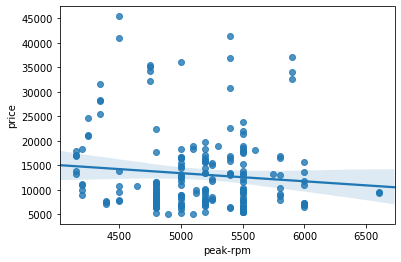

In [13]:
# Creating a plot peak-rpm and price
sns.regplot(x="peak-rpm", y="price", data=df)

In [14]:
# Using pandas corr() function
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.468695,-0.525095,-0.356792,-0.227799,-0.533078,-0.229281,-0.107229,-0.135712,0.007463,-0.177413,0.278059,-0.030557,0.039598,-0.083136
normalized-losses,0.468695,1.000000,-0.056919,0.019217,0.084342,-0.374472,0.097785,0.110998,-0.029330,0.055551,-0.114548,0.237788,-0.218973,-0.178351,0.133999
wheel-base,-0.525095,-0.056919,1.000000,0.877612,0.795115,0.582603,0.781763,0.573989,0.496912,0.147856,0.249199,-0.365525,-0.479633,-0.552897,0.587607
length,-0.356792,0.019217,0.877612,1.000000,0.841199,0.491969,0.878090,0.683830,0.608241,0.126713,0.157913,-0.287753,-0.673251,-0.706635,0.683372
width,-0.227799,0.084342,0.795115,0.841199,1.000000,0.274075,0.868493,0.737042,0.562663,0.177086,0.180287,-0.221372,-0.647177,-0.681169,0.730130
height,-0.533078,-0.374472,0.582603,0.491969,0.274075,1.000000,0.298429,0.068577,0.178237,-0.075251,0.261036,-0.326555,-0.055659,-0.113995,0.136123
curb-weight,-0.229281,0.097785,0.781763,0.878090,0.868493,0.298429,1.000000,0.850611,0.648965,0.170018,0.151372,-0.266348,-0.758238,-0.798088,0.820831
engine-size,-0.107229,0.110998,0.573989,0.683830,0.737042,0.068577,0.850611,1.000000,0.584069,0.205242,0.029083,-0.244547,-0.654101,-0.677775,0.861753
bore,-0.135712,-0.029330,0.496912,0.608241,0.562663,0.178237,0.648965,0.584069,1.000000,-0.051692,0.005949,-0.254389,-0.583781,-0.586361,0.532562
stroke,0.007463,0.055551,0.147856,0.126713,0.177086,-0.075251,0.170018,0.205242,-0.051692,1.000000,0.185050,-0.069455,-0.048697,-0.049536,0.083115


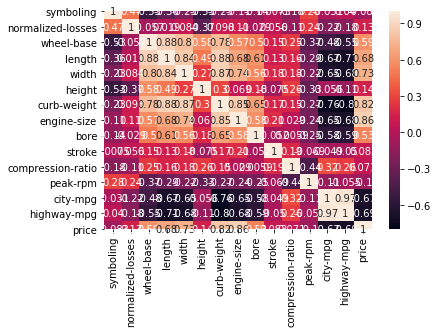

In [15]:
# Heatmap for correlation
sns.heatmap(df.corr(), annot=True) 

In [16]:
#from the heatmap engine size coefficent is the largest with price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

Pearson Correlation Coefficient is 0.8617532692401955  with a P-value of P = 1.9093505826889485e-61


Since our coefficient is >0.7 we can conclude that we are observing a high positive correlation between engine size and price.